In [2]:
%matplotlib inline

import underworld as uw
import math
from underworld import function as fn
import glucifer


In [3]:
linearMesh = uw.mesh.FeMesh_Cartesian('Q2/dPc1', (32,32), (0.,0.), (1.,1.))

In [4]:
constantMesh = linearMesh.subMesh

In [5]:
velocityField = uw.mesh.MeshVariable(linearMesh,2)
velocityField.data[:] = (0.,0.)

In [6]:
pressureField = uw.mesh.MeshVariable(constantMesh,1)
pressureField.data[:] = 0.

In [7]:
# setup freeslip
IWalls = linearMesh.specialSets["MinI_VertexSet"] + linearMesh.specialSets["MaxI_VertexSet"]
JWalls = linearMesh.specialSets["MinJ_VertexSet"] + linearMesh.specialSets["MaxJ_VertexSet"]
freeslip = uw.conditions.DirichletCondition(velocityField, (IWalls, JWalls))

In [8]:
linearMesh.specialSets.keys()

['MaxI_VertexSet',
 'MinI_VertexSet',
 'AllWalls_VertexSet',
 'MinJ_VertexSet',
 'MaxJ_VertexSet',
 'Empty']

In [9]:
# setup analytic functions
#solA = fn.analytic.SolCx()
# solA = fn.analytic.SolKx()
#solA = fn.analytic.SolKx(1.0, 5.73, 2, 0.7)
solA = fn.analytic.SolM(1.0,1,1,0.6)


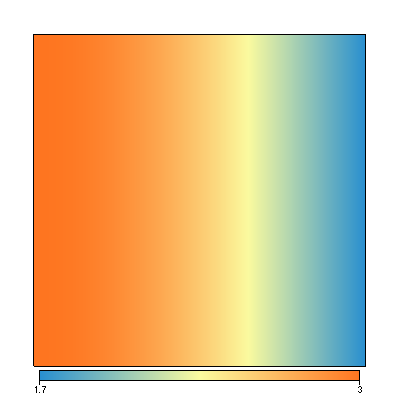

In [20]:
# get eta function from solA and take a look
eta = glucifer.Figure( figsize=(400,400) )
eta.append (glucifer.objects.Surface(linearMesh, solA.fn_viscosity))
eta.show()


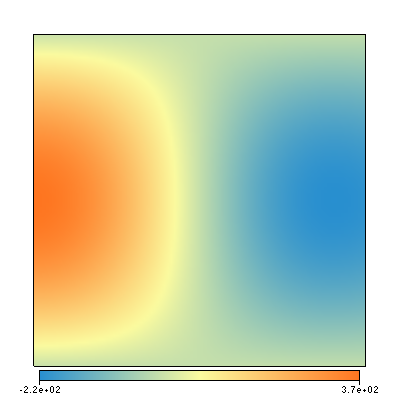

In [29]:
# grab the body force from SolA and take a look at vertical component

force = glucifer.Figure( figsize=(400,400) )
force.append(glucifer.objects.Surface(linearMesh, solA.fn_bodyforce[1]))
force.show()

In [23]:
solA.fn_bodyforce[1].evaluate((1.0,0.75))


array([[-148.29750846]])

In [25]:
# setup our stokes guy


stokesSystem = uw.systems.Stokes( velocityField  = velocityField, 
                                  pressureField  = pressureField,
                                  conditions     = [freeslip,],
                                  fn_viscosity   = solA.fn_viscosity, 
                                  fn_bodyforce   = solA.fn_bodyforce )

solver    = uw.systems.Solver( stokesSystem )




In [26]:
# lets solve
solver.solve()

In [27]:
errMesh=uw.mesh.FeMesh_Cartesian('Q1', (256,256), (0.,0.), (1.,1.))


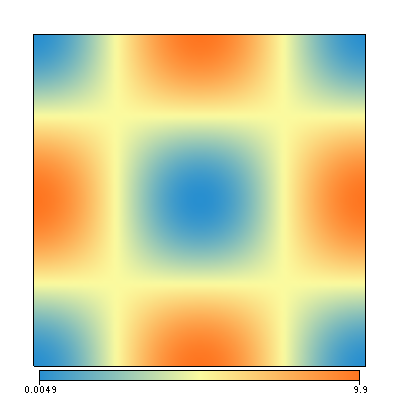

In [31]:
# lets check FEM solution

velMag = glucifer.Figure( figsize=(400,400) )
velMag.append(glucifer.objects.Surface(linearMesh, fn.math.dot(velocityField,velocityField)))
velMag.show()


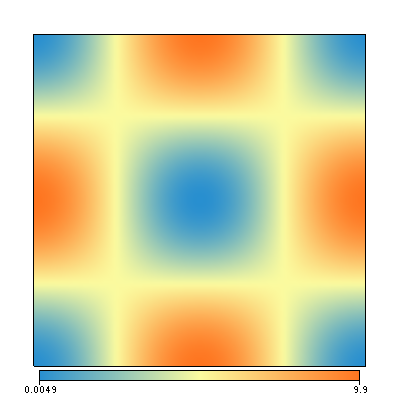

In [35]:
# and analytic

velMagA = glucifer.Figure( figsize=(400,400) )
velMagA.append(glucifer.objects.Surface(linearMesh, fn.math.dot(solA.fn_velocity,solA.fn_velocity)))
velMagA.show()



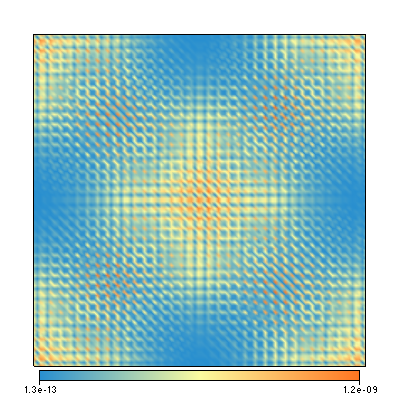

In [38]:
# and difference


velDiff = glucifer.Figure( figsize=(400,400) )
velDiff.append(glucifer.objects.Surface(errMesh, fn.math.dot(solA.fn_velocity - velocityField, solA.fn_velocity - velocityField)))
velDiff.show()


In [43]:
# rms
squared = uw.utils.Integral(fn.math.dot(solA.fn_velocity-velocityField,solA.fn_velocity-velocityField), linearMesh)
area = uw.utils.Integral(1.,linearMesh)
math.sqrt(squared.evaluate()[0]/area.evaluate()[0])

1.7227546508287365e-05

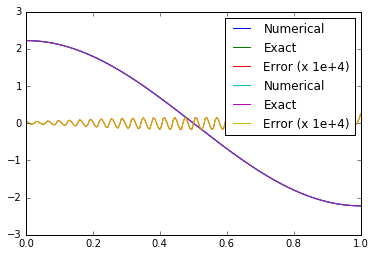

In [45]:
import numpy as np
N=201
a=np.ndarray(shape=(N,2))
a[:,1]=0.75*np.ones(N)
a[:,0]=np.linspace(0,1,N)
import matplotlib.pyplot as mplt
import matplotlib.pylab as pylab
vy=solA.fn_velocity[1].evaluate(a)[:,0]
ax=a[:,0]
vf=velocityField[1].evaluate(a)[:,0]
mplt.plot(ax,vf,label='Numerical')
mplt.plot(ax,vy,label='Exact')
mplt.plot(ax,10000*(vy-vf),label='Error (x 1e+4)')
mplt.legend()
mplt.plot(ax,vf,label='Numerical')
mplt.plot(ax,vy,label='Exact')
mplt.plot(ax,10000*(vy-vf),label='Error (x 1e+4)')
mplt.legend()

In [46]:
vf=velocityField[1].evaluate(a)[:,0]